# 1. Data Cleaning & Preprocessing
## I. Data Import & Validation

### Import libraries

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

### Load dataset

In [274]:
df = pd.read_csv("Students Social Media Addiction.csv")
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


### Verify structure

In [275]:
df.head(10)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
5,6,19,Female,Undergraduate,Australia,7.2,Instagram,Yes,4.5,4,Complicated,5,9
6,7,23,Male,Graduate,Germany,1.5,LinkedIn,No,8.0,9,Single,0,2
7,8,20,Female,Undergraduate,Brazil,5.8,Snapchat,Yes,6.0,6,In Relationship,2,8
8,9,18,Male,High School,Japan,4.0,TikTok,No,6.5,7,Single,1,5
9,10,21,Female,Graduate,South Korea,3.3,Instagram,No,7.0,7,In Relationship,1,4


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [277]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


## II. Convert categorical variables to the correct type

In [278]:
categorical_columns = ['Gender', 'Academic_Level', 'Country', 'Most_Used_Platform', 'Affects_Academic_Performance', 'Relationship_Status']
for col in categorical_columns:
    df[col] = df[col].astype('category')

## III. Handling Missing Values

In [279]:
df.isnull().sum()

Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

No any missing values in the dataset

## IV. Removing Duplicates

In [280]:
df.duplicated().sum()

np.int64(0)

No duplicates in the dataset

## V. Removing Outliers

### Identify outliers

In [281]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

column_outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col] #[col] is used to print only column values. If we don't use that it will return entire row

    column_outliers[col] = {
        "Quartile 1": Q1,
        "Quartile 3": Q3,
        "Lower bound": lower_bound,
        "Upper bound": upper_bound,
        "Outlier count": len(outliers)
    }

for column, info in column_outliers.items():
    print(f"\nColumn: {column}")
    for key, value in info.items():
        print(f"{key}:{value}")


Column: Student_ID
Quartile 1:177.0
Quartile 3:529.0
Lower bound:-351.0
Upper bound:1057.0
Outlier count:0

Column: Age
Quartile 1:19.0
Quartile 3:22.0
Lower bound:14.5
Upper bound:26.5
Outlier count:0

Column: Avg_Daily_Usage_Hours
Quartile 1:4.1
Quartile 3:5.8
Lower bound:1.5499999999999994
Upper bound:8.35
Outlier count:3

Column: Sleep_Hours_Per_Night
Quartile 1:6.0
Quartile 3:7.7
Lower bound:3.4499999999999997
Upper bound:10.25
Outlier count:0

Column: Mental_Health_Score
Quartile 1:5.0
Quartile 3:7.0
Lower bound:2.0
Upper bound:10.0
Outlier count:0

Column: Conflicts_Over_Social_Media
Quartile 1:2.0
Quartile 3:4.0
Lower bound:-1.0
Upper bound:7.0
Outlier count:0

Column: Addicted_Score
Quartile 1:5.0
Quartile 3:8.0
Lower bound:0.5
Upper bound:12.5
Outlier count:0


### Identify outliers using box plot

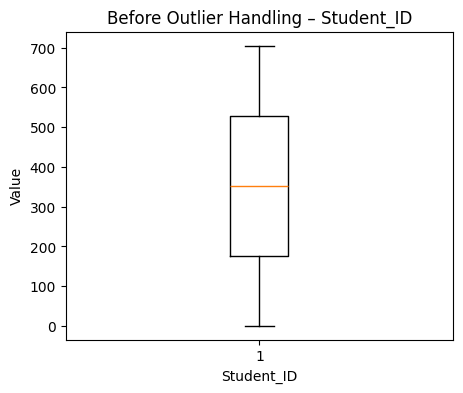

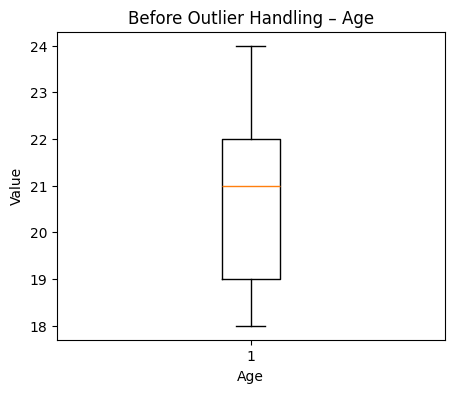

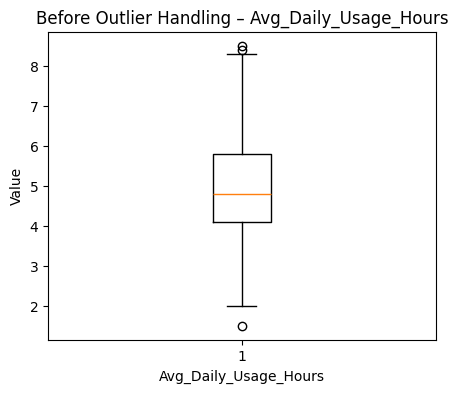

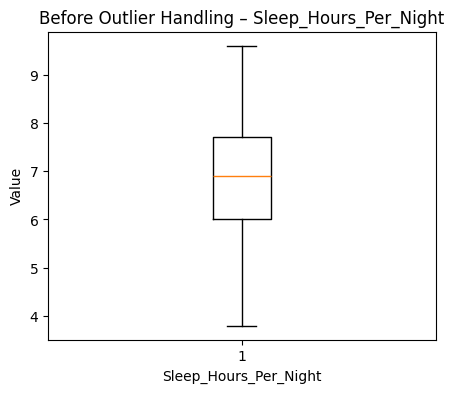

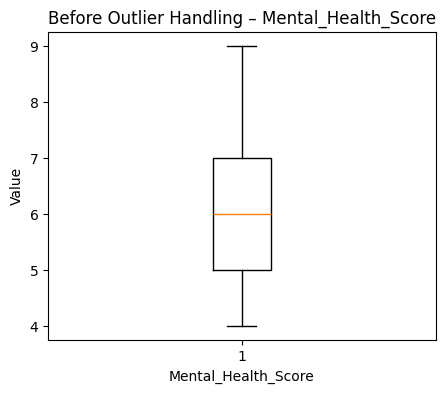

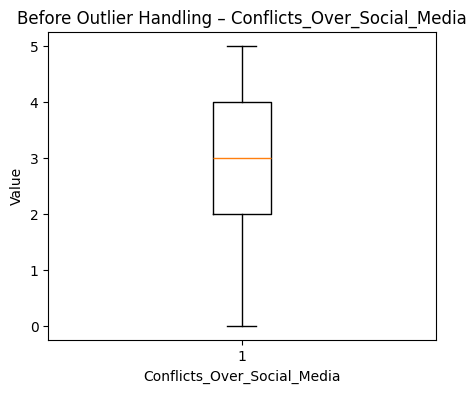

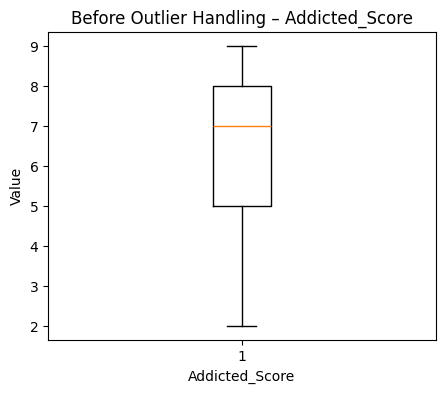

In [282]:
for col in numeric_cols:
    plt.figure(figsize=(5, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f"Before Outlier Handling – {col}")
    plt.xlabel(col)
    plt.ylabel("Value")
    plt.show()

### Remove outliers

In [283]:
def handle_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

for column in numeric_cols:
    df = handle_outliers_iqr(df, column)

### Check outliers after revome them using boxplots

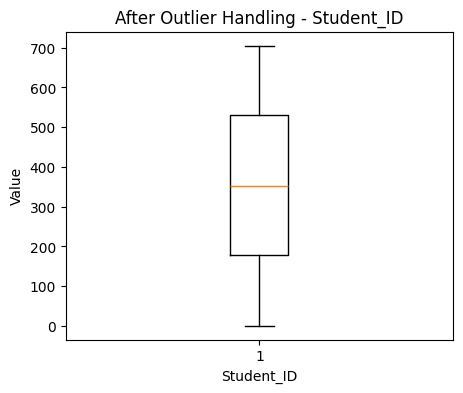

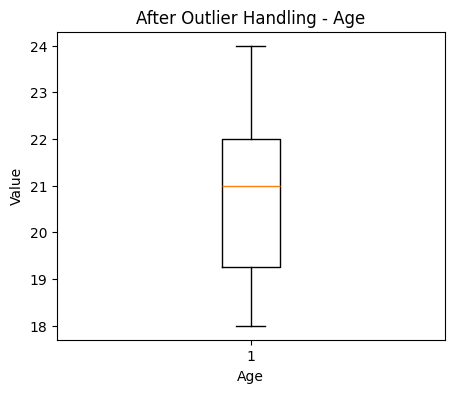

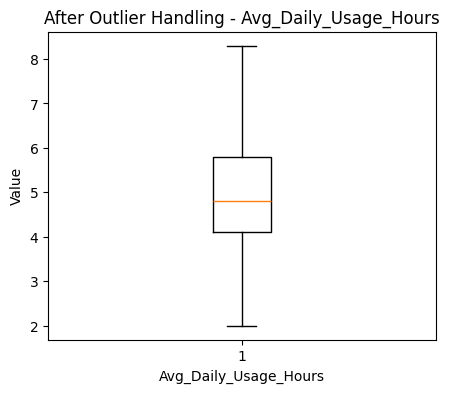

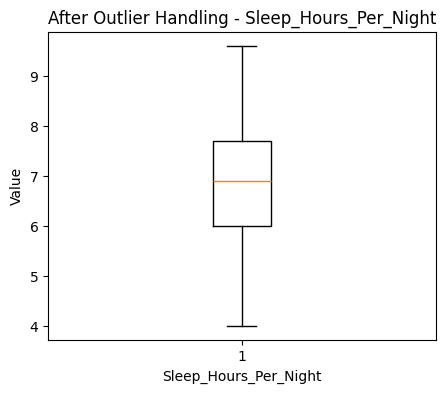

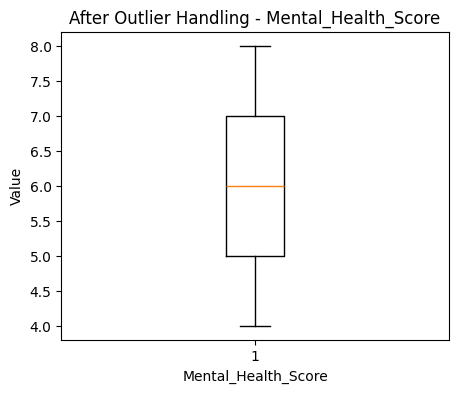

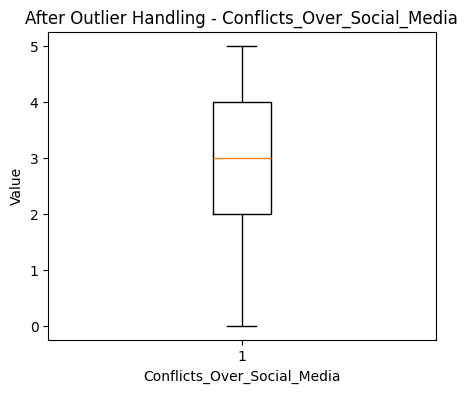

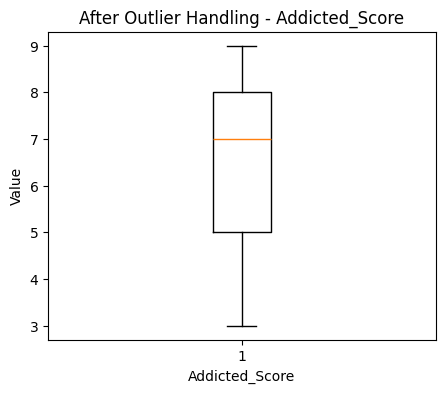

In [284]:
for col in numeric_cols:
    plt.figure(figsize=(5,4))
    plt.boxplot(df[col].dropna())
    plt.title(f"After Outlier Handling - {col}")
    plt.xlabel(col)
    plt.ylabel("Value")
    plt.show()


## VI. Normalization and Standardization

### Make a copy of the dataset 

In [285]:
df_copy = df.copy()
df_copy

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


### Normalization

In [286]:
scalar_standardization = StandardScaler()
scalar_minmax = MinMaxScaler()

numeric_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', "Addicted_Score"]

normalized_data = scalar_minmax.fit_transform(df[numeric_cols])

normalized_df = pd.DataFrame(normalized_data, columns=['Age_norm', 'Avg_Daily_Usage_Hours_norm', 'Sleep_Hours_Per_Night_norm', 'Mental_Health_Score_norm', 'Conflicts_Over_Social_Media_norm', 'Addicted_Score_norm'])

df_copy = pd.concat([df.reset_index(drop=True), normalized_df], axis=1)
df_copy


,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Age_norm,Avg_Daily_Usage_Hours_norm,Sleep_Hours_Per_Night_norm,Mental_Health_Score_norm,Conflicts_Over_Social_Media_norm,Addicted_Score_norm
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,0.166667,0.507937,0.446429,0.50,0.6,0.833333
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,0.666667,0.015873,0.625000,1.00,0.0,0.000000
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,0.333333,0.634921,0.178571,0.25,0.8,1.000000
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,0.000000,0.158730,0.535714,0.75,0.2,0.166667
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,0.500000,0.396825,0.357143,0.50,0.4,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5,0.333333,0.428571,0.571429,0.75,0.4,0.333333
698,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9,0.833333,0.761905,0.339286,0.00,1.0,1.000000
699,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7,0.500000,0.571429,0.482143,0.50,0.6,0.666667
700,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4,1.000000,0.365079,0.625000,1.00,0.4,0.166667


### Standardization

In [287]:
standardization_data = scalar_standardization.fit_transform(df[numeric_cols])

standardization_df = pd.DataFrame(standardization_data, columns=['Age_std', 'Avg_Daily_Usage_Hours_std', 'Sleep_Hours_Per_Night_std', 'Mental_Health_Score_std', 'Conflicts_Over_Social_Media_std', 'Addicted_Score_std'])

# 2. Analytics Framework 

## I. Feature Engineering
### Combine normalized + standardized data into a single dataframe for feature engineering

In [288]:
df_copy = pd.concat([df_copy.reset_index(drop=True), standardization_df], axis=1)
df_fe = df_copy
df_fe

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,...,Sleep_Hours_Per_Night_norm,Mental_Health_Score_norm,Conflicts_Over_Social_Media_norm,Addicted_Score_norm,Age_std,Avg_Daily_Usage_Hours_std,Sleep_Hours_Per_Night_std,Mental_Health_Score_std,Conflicts_Over_Social_Media_std,Addicted_Score_std
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,...,0.446429,0.50,0.6,0.833333,-1.188107,0.231343,-0.336837,-0.205958,0.157229,0.993304
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,...,0.625000,1.00,0.0,0.000000,0.959664,-2.272131,0.559183,1.612688,-2.996338,-2.182013
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,...,0.178571,0.25,0.8,1.000000,-0.472183,0.877401,-1.680867,-1.115280,1.208418,1.628368
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,...,0.535714,0.75,0.2,0.166667,-1.904031,-1.545316,0.111173,0.703365,-1.945149,-1.546950
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,...,0.357143,0.50,0.4,0.666667,0.243740,-0.333958,-0.784847,-0.205958,-0.893960,0.358241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,...,0.571429,0.75,0.4,0.333333,-0.472183,-0.172443,0.290377,0.703365,-0.893960,-0.911886
698,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,...,0.339286,0.00,1.0,1.000000,1.675588,1.523459,-0.874449,-2.024603,2.259608,1.628368
699,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,...,0.482143,0.50,0.6,0.666667,0.243740,0.554372,-0.157633,-0.205958,0.157229,0.358241
700,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,...,0.625000,1.00,0.4,0.166667,2.391512,-0.495472,0.559183,1.612688,-0.893960,-1.546950


### Derive features

In [289]:
df_fe['Usage_Sleep_Ratio'] = df_fe['Avg_Daily_Usage_Hours'] / (df_fe['Sleep_Hours_Per_Night'] + 1e-9)
df_fe['Interaction_MH_Usage'] = df_fe['Mental_Health_Score'] * df_fe['Avg_Daily_Usage_Hours']
df_fe['Usage_Flag'] = (df_fe['Avg_Daily_Usage_Hours'] > 3).astype(int)
df_fe['Sleep_Flag'] = (df_fe['Sleep_Hours_Per_Night'] < 6).astype(int)

df_fe['Addiction_Level'] = pd.qcut(df_fe['Addicted_Score'], q=3, labels=['Low','Moderate','High'])
df_fe['Addiction_Level_Encoded'] = df_fe['Addiction_Level'].map({'Low':0, 'Moderate':1, 'High':2}) # Encoding Addiction_Level

df_fe[['Usage_Sleep_Ratio','Interaction_MH_Usage','Usage_Flag','Sleep_Flag', 'Addiction_Level','Addiction_Level_Encoded']].head()

,Usage_Sleep_Ratio,Interaction_MH_Usage,Usage_Flag,Sleep_Flag,Addiction_Level,Addiction_Level_Encoded
0,0.800000,31.2,1,0,High,2
1,0.280000,16.8,0,0,Low,0
2,1.200000,30.0,1,1,High,2
3,0.428571,21.0,0,0,Low,0
4,0.750000,27.0,1,0,Moderate,1


### Quick correlation

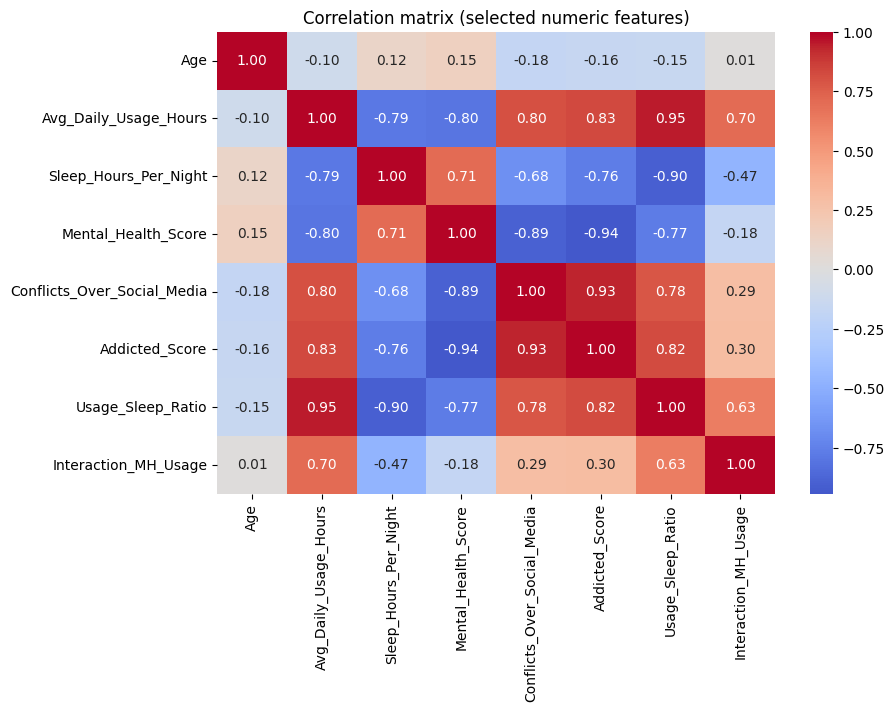

Addicted_Score                 1.000000
Conflicts_Over_Social_Media    0.932669
Avg_Daily_Usage_Hours          0.829678
Usage_Sleep_Ratio              0.822835
Interaction_MH_Usage           0.301034
Age                           -0.157913
Sleep_Hours_Per_Night         -0.764002
Mental_Health_Score           -0.944618
Name: Addicted_Score, dtype: float64

In [290]:
num_cols_for_corr = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score', 'Usage_Sleep_Ratio', 'Interaction_MH_Usage']
corr = df_fe[num_cols_for_corr].corr()
plt.figure(figsize=(9,6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation matrix (selected numeric features)')
plt.show()

corr['Addicted_Score'].sort_values(ascending=False)

## II. Build multiple predictive models

### Prepare features and target for modeling

In [291]:
df_fe

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,...,Sleep_Hours_Per_Night_std,Mental_Health_Score_std,Conflicts_Over_Social_Media_std,Addicted_Score_std,Usage_Sleep_Ratio,Interaction_MH_Usage,Usage_Flag,Sleep_Flag,Addiction_Level,Addiction_Level_Encoded
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,...,-0.336837,-0.205958,0.157229,0.993304,0.800000,31.2,1,0,High,2
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,...,0.559183,1.612688,-2.996338,-2.182013,0.280000,16.8,0,0,Low,0
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,...,-1.680867,-1.115280,1.208418,1.628368,1.200000,30.0,1,1,High,2
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,...,0.111173,0.703365,-1.945149,-1.546950,0.428571,21.0,0,0,Low,0
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,...,-0.784847,-0.205958,-0.893960,0.358241,0.750000,27.0,1,0,Moderate,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,...,0.290377,0.703365,-0.893960,-0.911886,0.652778,32.9,1,0,Low,0
698,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,...,-0.874449,-2.024603,2.259608,1.628368,1.152542,27.2,1,1,High,2
699,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,...,-0.157633,-0.205958,0.157229,0.358241,0.835821,33.6,1,0,Moderate,1
700,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,...,0.559183,1.612688,-0.893960,-1.546950,0.573333,34.4,1,0,Low,0


### Take numerical columns

In [292]:
target = 'Addicted_Score'
y = df_fe[target]
exclude_cols = ['Student_ID', target]
feature_cols = []

for col in df_fe.columns:
    if col not in exclude_cols:
        feature_cols.append(col)

new_numeric_cols = []

for col in numeric_cols:
    if col not in exclude_cols:
        new_numeric_cols.append(col) # Remove Addicted Score column


numerical_cols = ['Usage_Sleep_Ratio', 'Interaction_MH_Usage', 'Usage_Flag', 'Sleep_Flag']

for col in numerical_cols:
    if col not in exclude_cols:
        new_numeric_cols.append(col)

X_numeric = df_fe[new_numeric_cols].copy()
X_numeric


,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Usage_Sleep_Ratio,Interaction_MH_Usage,Usage_Flag,Sleep_Flag
0,19,5.2,6.5,6,3,0.800000,31.2,1,0
1,22,2.1,7.5,8,0,0.280000,16.8,0,0
2,20,6.0,5.0,5,4,1.200000,30.0,1,1
3,18,3.0,7.0,7,1,0.428571,21.0,0,0
4,21,4.5,6.0,6,2,0.750000,27.0,1,0
...,...,...,...,...,...,...,...,...,...
697,20,4.7,7.2,7,2,0.652778,32.9,1,0
698,23,6.8,5.9,4,5,1.152542,27.2,1,1
699,21,5.6,6.7,6,3,0.835821,33.6,1,0
700,24,4.3,7.5,8,2,0.573333,34.4,1,0


### Encode categorical columns

In [293]:
categorical_cols = df_fe[feature_cols].select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols.remove('Addiction_Level')
categorical_cols.remove('Addiction_Level_Encoded')

if categorical_cols:
    X_encoded = pd.get_dummies(df_fe[categorical_cols], drop_first=True, prefix=categorical_cols)
    X_final = pd.concat([X_numeric, X_encoded], axis=1)

X_final.shape

(702, 135)

### split dataset into test and train

In [294]:
X = X_final
y = df_fe['Addicted_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear regression model

In [295]:
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)
"R2 Score: ", r2_score(y_test, y_pred_linear)

('R2 Score: ', 0.9585728013556476)